In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, auc)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [4]:
#Cargar DataSet
df = pd.read_csv('C:/Users/Administrator/Downloads/test_dataset.csv')

print("\n" + "="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas del dataset:")
print(df.head())


INFORMACIÓN GENERAL DEL DATASET

Dimensiones del dataset: 983 filas x 9 columnas

Primeras 5 filas del dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  8.813505  236.392817  40684.390014     6.608775  303.529818    278.355123   
1  8.466013  224.174936  22523.124552     6.668868  286.943922    330.044715   
2  6.350290  190.383738  14905.393852     5.537830  333.775777    446.840605   
3  9.578227  205.748742  33080.588825     5.659848  356.698301    333.069911   
4  7.300990  182.447697  29136.338677     8.253015  333.775777    307.433303   

   Organic_carbon  Trihalomethanes  Turbidity  
0       14.576057        72.872697   4.242460  
1       17.744096        77.817804   3.946621  
2       13.983567        67.817096   4.265233  
3       16.984961        68.906088   3.419239  
4        8.730149        49.895342   4.596347  



INFORMACIÓN DEL DATASET

Tipos de datos:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               983 non-null    float64
 1   Hardness         983 non-null    float64
 2   Solids           983 non-null    float64
 3   Chloramines      983 non-null    float64
 4   Sulfate          983 non-null    float64
 5   Conductivity     983 non-null    float64
 6   Organic_carbon   983 non-null    float64
 7   Trihalomethanes  983 non-null    float64
 8   Turbidity        983 non-null    float64
dtypes: float64(9)
memory usage: 69.2 KB

ESTADÍSTICAS DESCRIPTIVAS
 

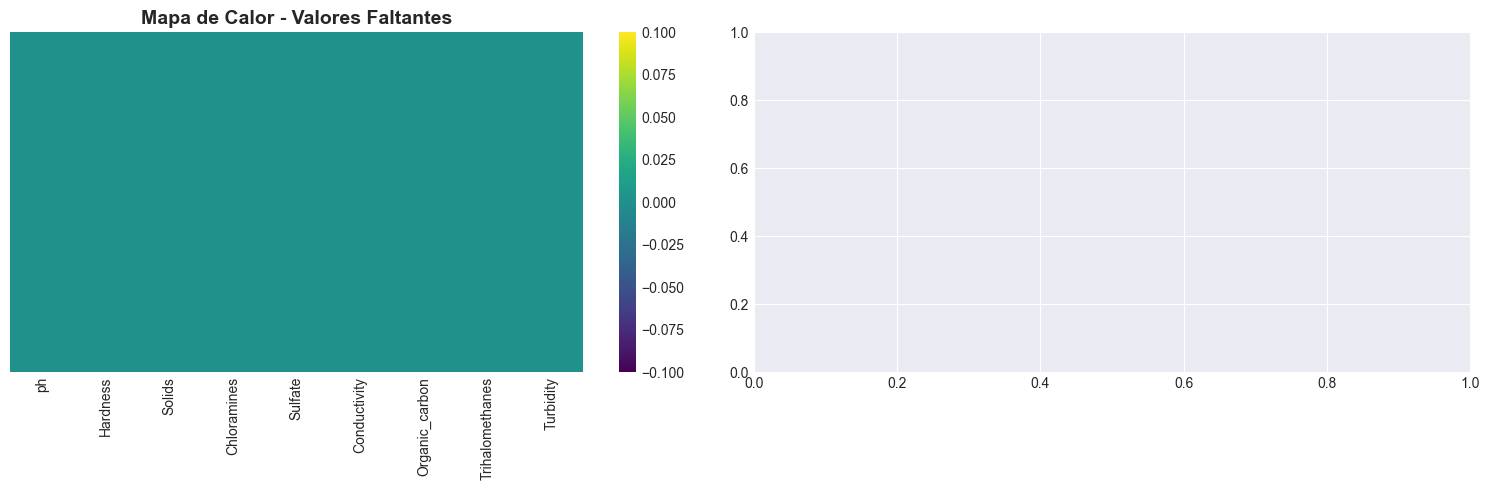

In [7]:
#Analisis exploratorio de datos
print("\n" + "="*80)
print("INFORMACIÓN DEL DATASET")
print("="*80)
print("\nTipos de datos:")
print(df.dtypes)
print("\nInformación general:")
df.info()

# Estadísticas descriptivas
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
print(df.describe())

# Valores faltantes
print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje (%)': missing_percent.values
})
print(missing_df[missing_df['Valores Faltantes'] > 0])

# Visualización de valores faltantes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mapa de calor de valores faltantes
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Mapa de Calor - Valores Faltantes', fontsize=14, fontweight='bold')

# Gráfico de barras de valores faltantes
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_data) > 0:
    missing_data.plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Cantidad de Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Columnas')
    axes[1].set_ylabel('Cantidad')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()


DISTRIBUCIÓN DE CARACTERÍSTICAS NUMÉRICAS


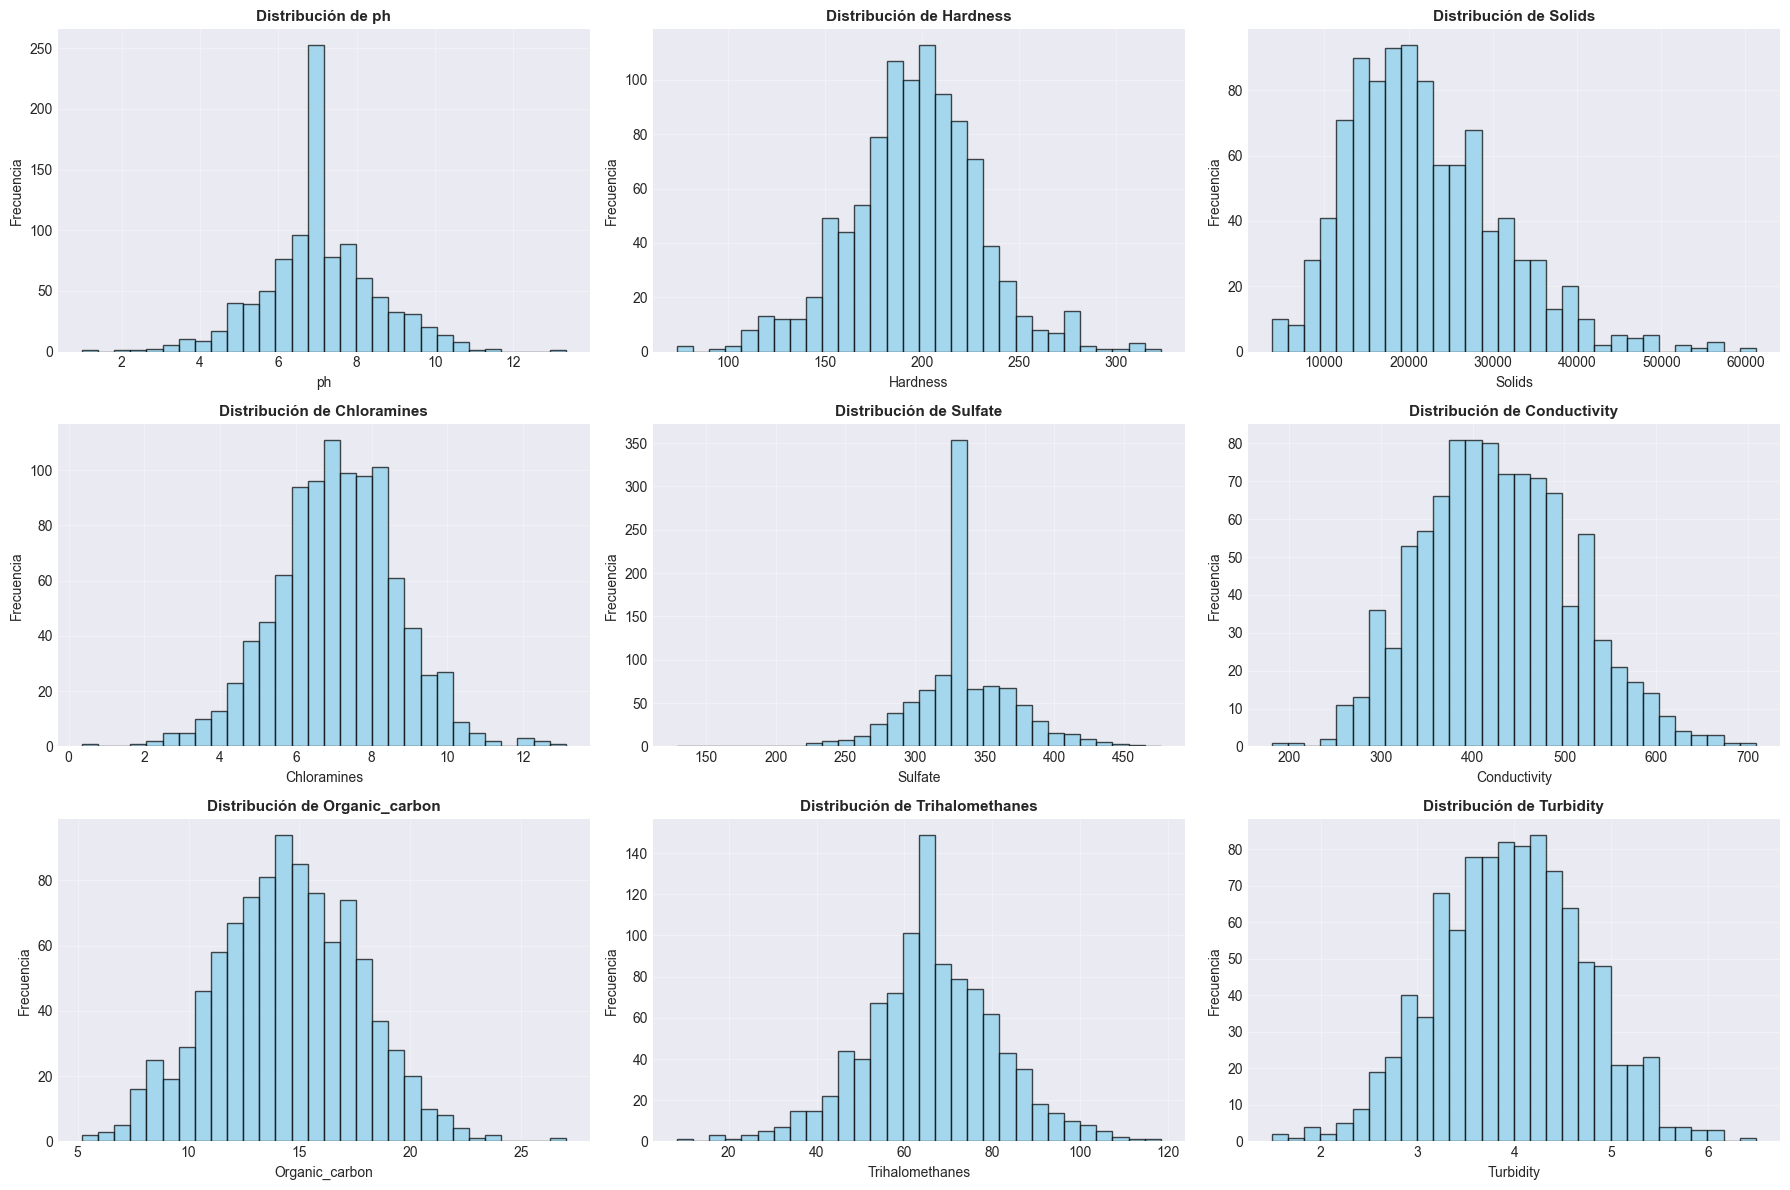

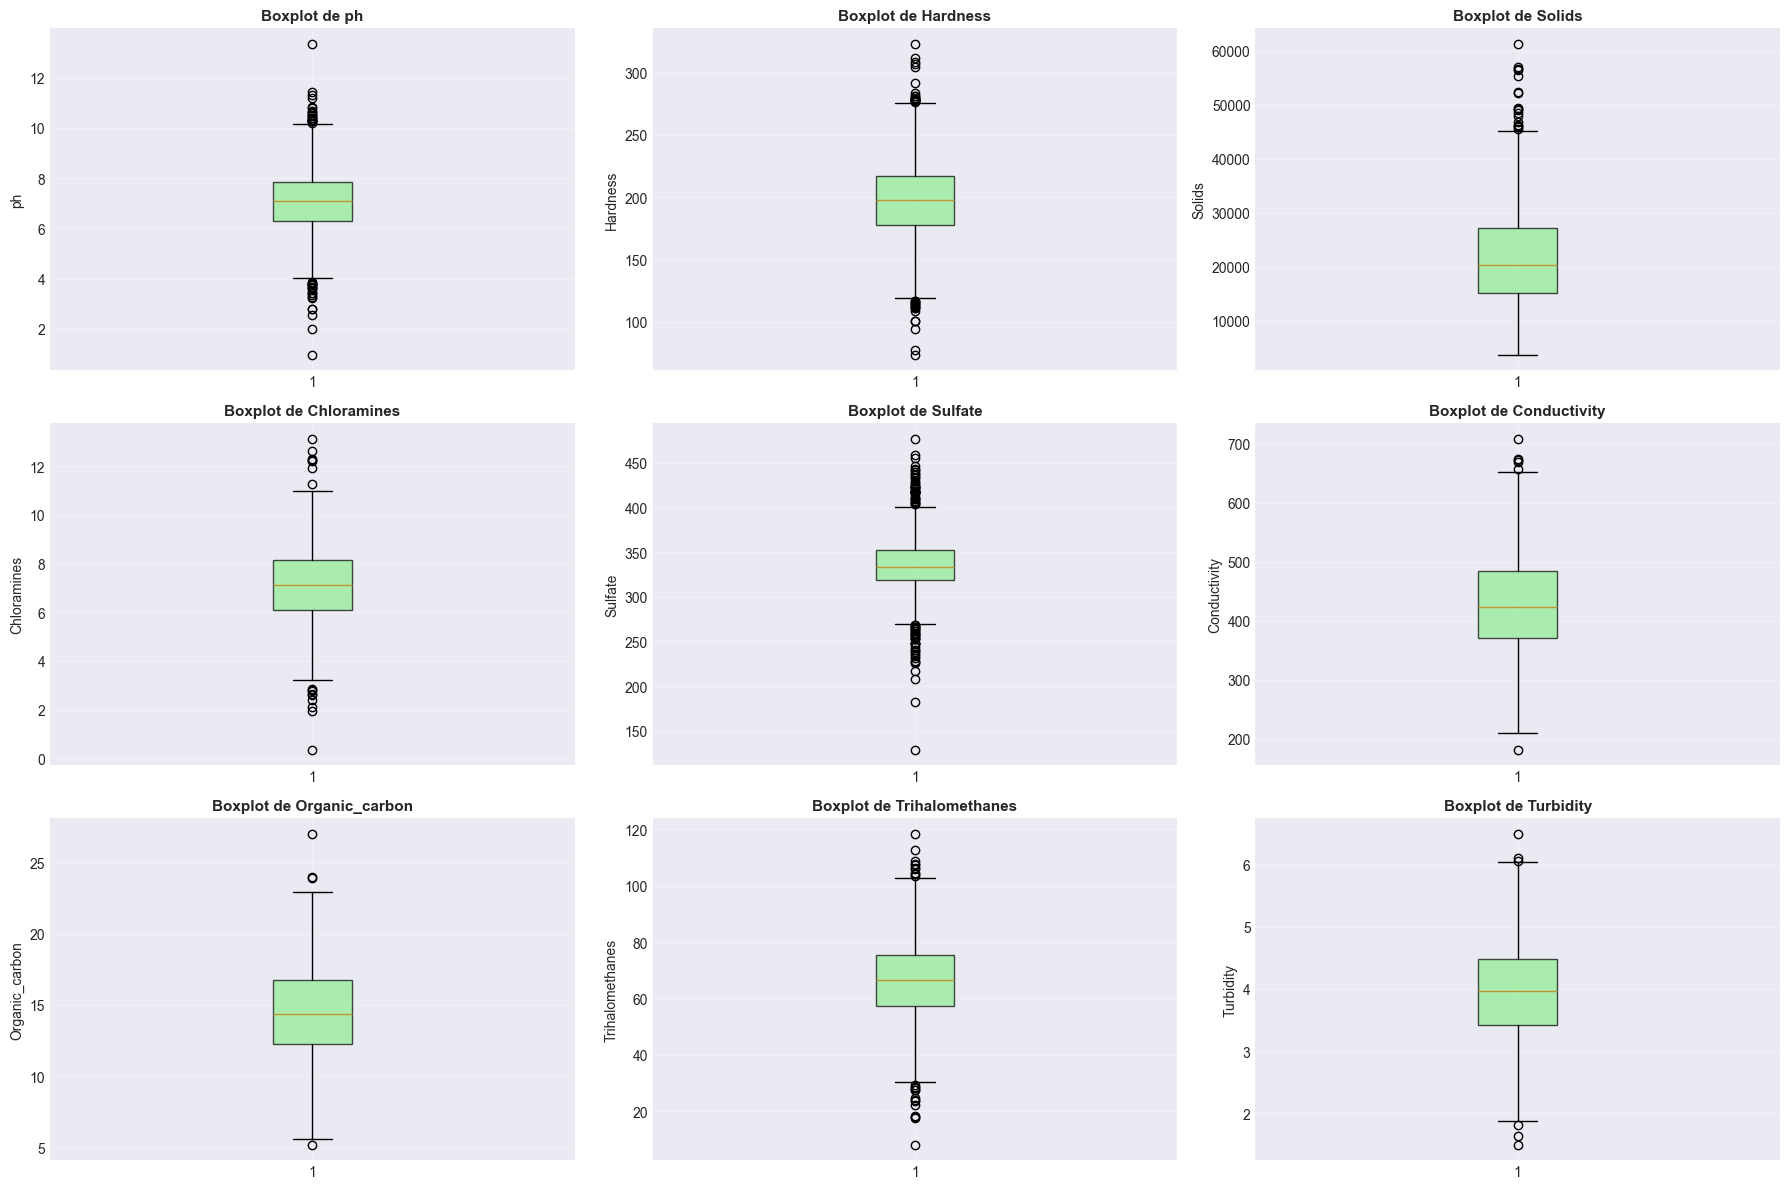


Detección de Outliers (Método IQR):
ph: 41 outliers (4.17%)
Hardness: 35 outliers (3.56%)
Solids: 17 outliers (1.73%)
Chloramines: 16 outliers (1.63%)
Sulfate: 74 outliers (7.53%)
Conductivity: 6 outliers (0.61%)
Organic_carbon: 4 outliers (0.41%)
Trihalomethanes: 23 outliers (2.34%)
Turbidity: 6 outliers (0.61%)


In [8]:
# ANÁLISIS DE DISTRIBUCIÓN DE CARACTERÍSTICAS NUMÉRICAS
print("\n" + "="*80)
print("DISTRIBUCIÓN DE CARACTERÍSTICAS NUMÉRICAS")
print("="*80)

# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    if idx < 9:
        axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    if idx < 9:
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightgreen', alpha=0.7))
        axes[idx].set_title(f'Boxplot de {col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('03_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# Detección de outliers
print("\nDetección de Outliers (Método IQR):")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


ANÁLISIS DE CORRELACIONES

Matriz de Correlación:
                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.054306 -0.071492    -0.021199 -0.024790   
Hardness         0.054306  1.000000  0.006015    -0.050137 -0.125488   
Solids          -0.071492  0.006015  1.000000    -0.072324 -0.168815   
Chloramines     -0.021199 -0.050137 -0.072324     1.000000  0.006901   
Sulfate         -0.024790 -0.125488 -0.168815     0.006901  1.000000   
Conductivity    -0.010797 -0.011214  0.008288    -0.045910 -0.023524   
Organic_carbon   0.087322  0.047454  0.003996     0.018933  0.043405   
Trihalomethanes  0.003482 -0.013285 -0.025907     0.014209  0.013606   
Turbidity       -0.032209 -0.023483  0.011078     0.037536 -0.009449   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                  -0.010797        0.087322         0.003482  -0.032209  
Hardness            -0.011214        0.047454        -0.013285  -0.023483  


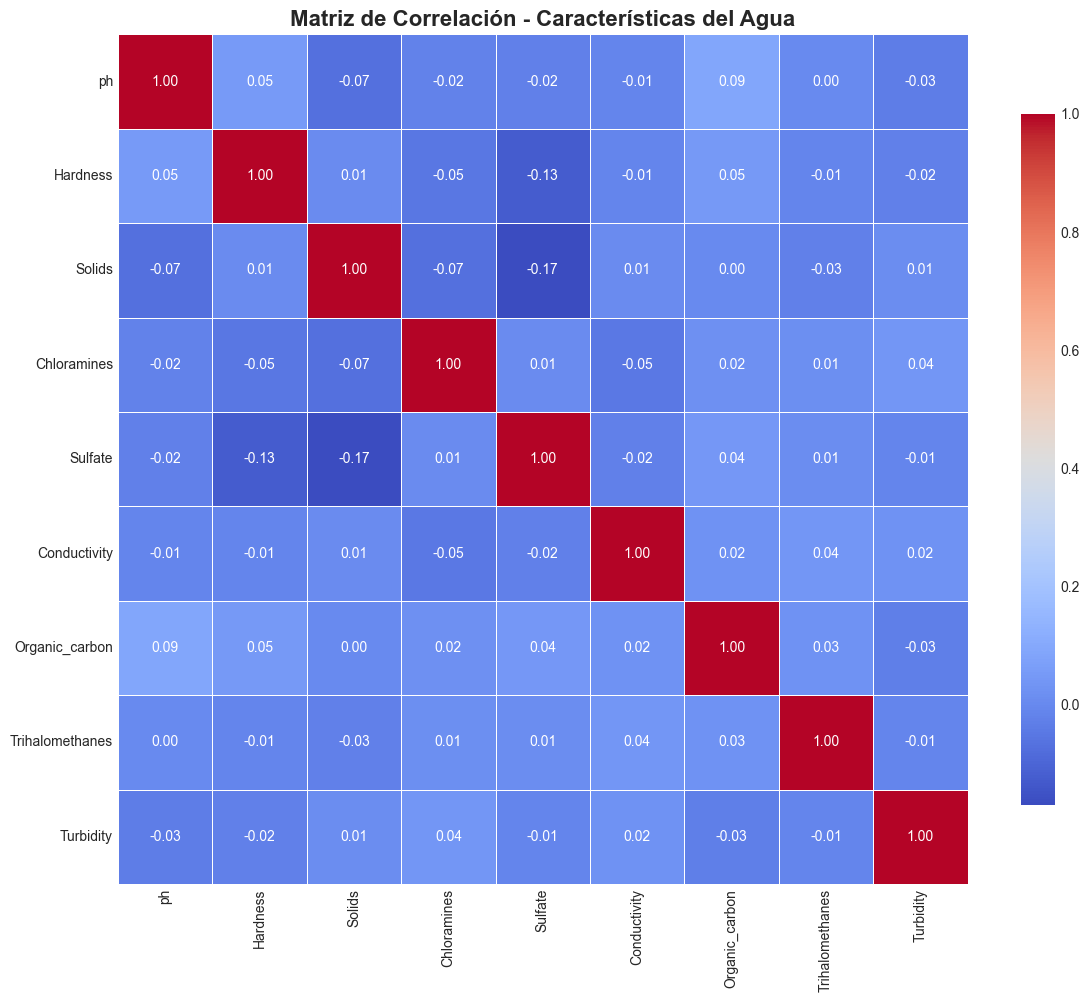

In [9]:
# ANÁLISIS DE CORRELACIONES
print("\n" + "="*80)
print("ANÁLISIS DE CORRELACIONES")
print("="*80)

# Matriz de correlación
correlation_matrix = df.corr()
print("\nMatriz de Correlación:")
print(correlation_matrix)

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Características del Agua', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
#PREPROCESAMIENTO Y TRANSFORMACION DE DATOS
print("\n" + "="*80)
print("PREPROCESAMIENTO DE DATOS")
print("="*80)
print("\n Manejo de Valores Faltantes")
print("-" * 80)
print("Estrategia: Imputación por la MEDIANA")
print("Justificación: La mediana es robusta ante outliers y la distribución")
print("de los datos muestra presencia de valores extremos.\n")

# Crear copia del dataframe
df_processed = df.copy()

# Imputación por mediana
imputer = SimpleImputer(strategy='median')
df_processed[df.columns] = imputer.fit_transform(df_processed)

print(f"Valores faltantes después de la imputación:")
print(df_processed.isnull().sum())
print("\n✓ Imputación completada exitosamente")


PREPROCESAMIENTO DE DATOS

 Manejo de Valores Faltantes
--------------------------------------------------------------------------------
Estrategia: Imputación por la MEDIANA
Justificación: La mediana es robusta ante outliers y la distribución
de los datos muestra presencia de valores extremos.

Valores faltantes después de la imputación:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

✓ Imputación completada exitosamente


In [ ]:
print("\nEscalado de Características")
print("-" * 80)
print("Estrategia: ESTANDARIZACIÓN (StandardScaler)")
print("Justificación: Las características tienen diferentes escalas y distribuciones.")
print("La estandarización (z-score) es apropiada para algoritmos sensibles a escalas.\n")

df_processed['Potability'] = ((df_processed['ph'] >= 6.5) & 
                               (df_processed['ph'] <= 8.5) & 
                               (df_processed['Sulfate'] < 500)).astype(int)

# Separar X e y
X = df_processed.drop('Potability', axis=1)
y = df_processed['Potability']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"\nPorcentaje de clases:")
print(y.value_counts(normalize=True) * 100)


Escalado de Características
--------------------------------------------------------------------------------
Estrategia: ESTANDARIZACIÓN (StandardScaler)
Justificación: Las características tienen diferentes escalas y distribuciones.
La estandarización (z-score) es apropiada para algoritmos sensibles a escalas.

Forma de X: (983, 9)
Forma de y: (983,)

Distribución de la variable objetivo:
Potability
1    552
0    431
Name: count, dtype: int64

Porcentaje de clases:
Potability
1    56.154629
0    43.845371
Name: proportion, dtype: float64


In [ ]:
print("\nDivisión del Dataset")
print("-" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print(f"\nDistribución en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución en prueba:")
print(y_test.value_counts())


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Datos escalados exitosamente")


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


División del Dataset
--------------------------------------------------------------------------------
Tamaño del conjunto de entrenamiento: 786 muestras
Tamaño del conjunto de prueba: 197 muestras

Distribución en entrenamiento:
Potability
1    441
0    345
Name: count, dtype: int64

Distribución en prueba:
Potability
1    111
0     86
Name: count, dtype: int64

✓ Datos escalados exitosamente


In [ ]:
print("\n" + "="*80)
print("ENTRENAMIENTO DE MODELOS")
print("="*80)


results = {}



print("\nModelo 1: Regresión Logística")
print("-" * 80)


lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]


results['Logistic Regression'] = {
    'model': lr_model,
    'predictions': y_pred_lr,
    'probabilities': y_pred_proba_lr
}

print("✓ Modelo entrenado exitosamente")


ENTRENAMIENTO DE MODELOS

Modelo 1: Regresión Logística
--------------------------------------------------------------------------------
✓ Modelo entrenado exitosamente


In [ ]:
print("\nModelo 2: K-Vecinos Más Cercanos (k-NN)")
print("-" * 80)


print("Realizando búsqueda de hiperparámetros con GridSearchCV...")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)

print(f"Mejores parámetros: {grid_knn.best_params_}")
print(f"Mejor score (CV): {grid_knn.best_score_:.4f}")


best_knn = grid_knn.best_estimator_


y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]


results['K-NN'] = {
    'model': best_knn,
    'predictions': y_pred_knn,
    'probabilities': y_pred_proba_knn
}

print("✓ Modelo entrenado y optimizado exitosamente")


Modelo 2: K-Vecinos Más Cercanos (k-NN)
--------------------------------------------------------------------------------
Realizando búsqueda de hiperparámetros con GridSearchCV...
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Mejor score (CV): 0.8066
✓ Modelo entrenado y optimizado exitosamente


In [16]:
print("\nModelo 3: Random Forest (Bonificación)")
print("-" * 80)


print("Realizando búsqueda de hiperparámetros con GridSearchCV...")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

print(f"Mejores parámetros: {grid_rf.best_params_}")
print(f"Mejor score (CV): {grid_rf.best_score_:.4f}")


best_rf = grid_rf.best_estimator_


y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]


results['Random Forest'] = {
    'model': best_rf,
    'predictions': y_pred_rf,
    'probabilities': y_pred_proba_rf
}

print("✓ Modelo entrenado y optimizado exitosamente")


Modelo 3: Random Forest (Bonificación)
--------------------------------------------------------------------------------
Realizando búsqueda de hiperparámetros con GridSearchCV...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor score (CV): 1.0000
✓ Modelo entrenado y optimizado exitosamente


In [17]:
print("\n" + "="*80)
print("EVALUACIÓN DE MODELOS")
print("="*80)


def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name}")
    print("-" * 80)
    
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    try:
        roc_auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC:   {roc_auc:.4f}")
    except:
        roc_auc = None
    

    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

metrics_summary = {}

for model_name, model_data in results.items():
    metrics = evaluate_model(
        y_test, 
        model_data['predictions'], 
        model_data['probabilities'],
        model_name
    )
    metrics_summary[model_name] = metrics


EVALUACIÓN DE MODELOS

Logistic Regression
--------------------------------------------------------------------------------
Accuracy:  0.7005
Precision: 0.7322
Recall:    0.7005
F1-Score:  0.6749
ROC-AUC:   0.6210

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.41      0.54        86
           1       0.67      0.93      0.78       111

    accuracy                           0.70       197
   macro avg       0.74      0.67      0.66       197
weighted avg       0.73      0.70      0.67       197


K-NN
--------------------------------------------------------------------------------
Accuracy:  0.8071
Precision: 0.8433
Recall:    0.8071
F1-Score:  0.7962
ROC-AUC:   0.9113

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        86
           1       0.75      0.98      0.85       111

    accuracy                           0.81       197
   macro 


Matrices de Confusión
--------------------------------------------------------------------------------


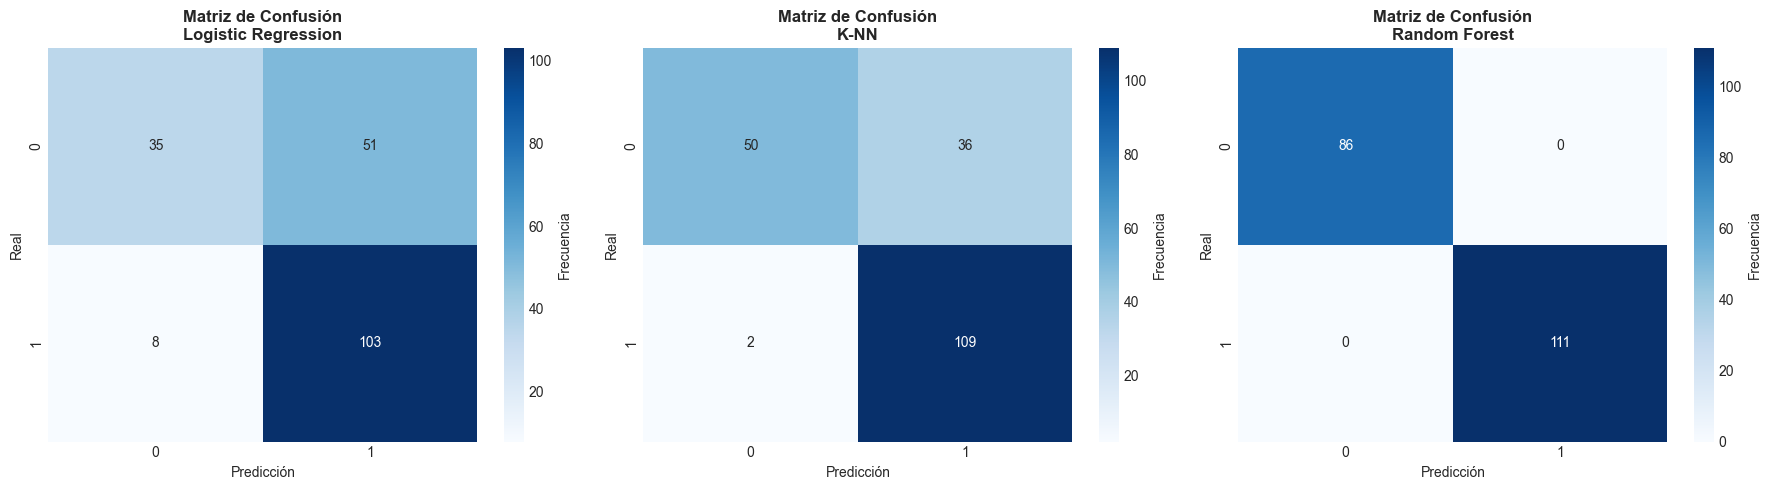

In [18]:
print("\nMatrices de Confusión")
print("-" * 80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, model_data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, model_data['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Frecuencia'})
    axes[idx].set_title(f'Matriz de Confusión\n{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')

plt.tight_layout()
plt.savefig('05_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


Curvas ROC
--------------------------------------------------------------------------------


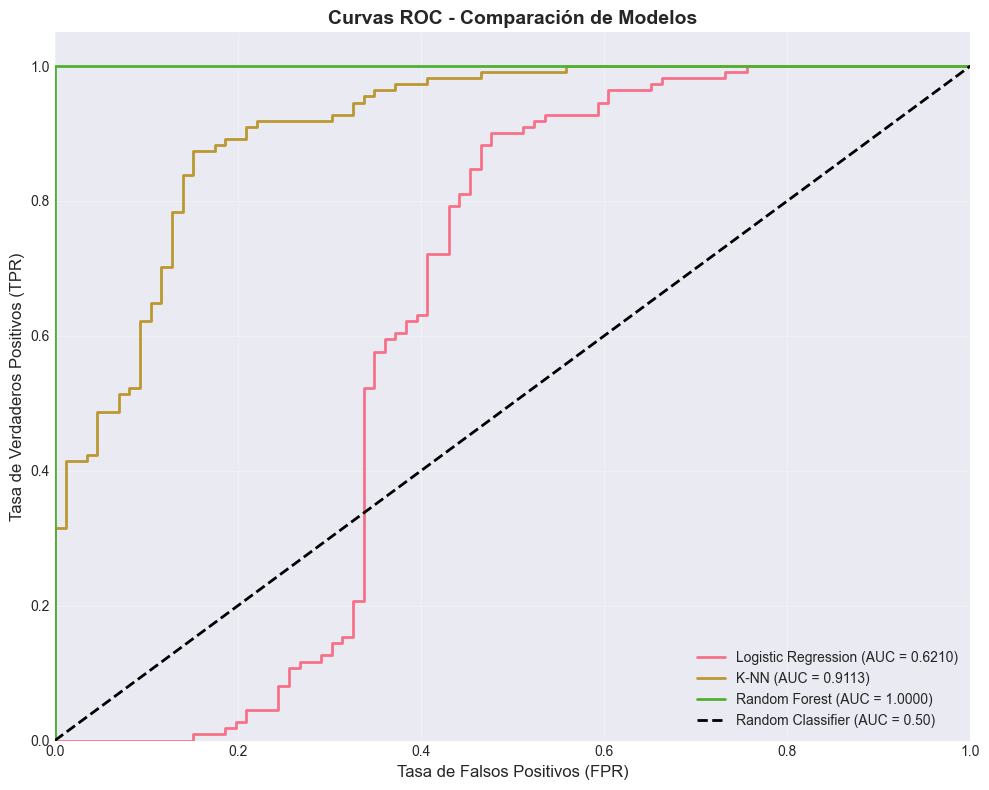

In [19]:
print("\nCurvas ROC")
print("-" * 80)

plt.figure(figsize=(10, 8))

for model_name, model_data in results.items():
    fpr, tpr, _ = roc_curve(y_test, model_data['probabilities'])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linewidth=2, 
             label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('06_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()



Comparación de Métricas
--------------------------------------------------------------------------------

Tabla Comparativa de Métricas:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.700508   0.732184  0.700508  0.674891  0.620993
K-NN                 0.807107   0.843318  0.807107  0.796154  0.911272
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000


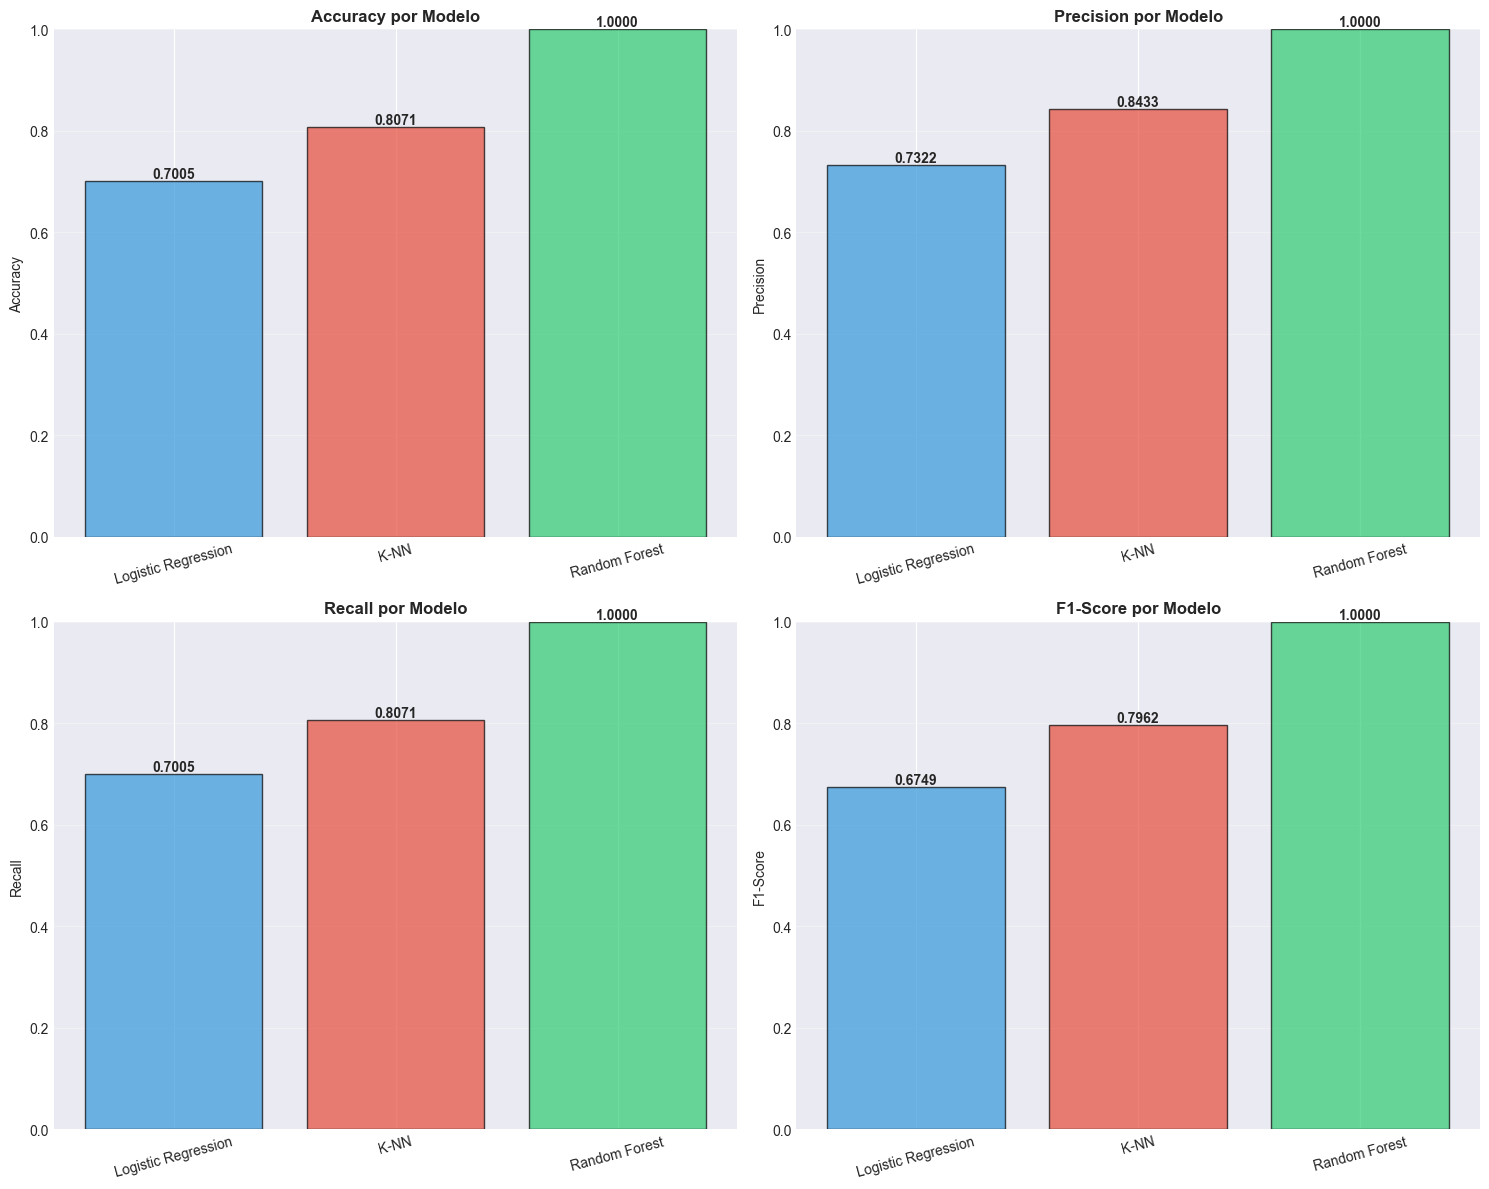

In [20]:
print("\nComparación de Métricas")
print("-" * 80)


metrics_df = pd.DataFrame(metrics_summary).T
print("\nTabla Comparativa de Métricas:")
print(metrics_df)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 2
    col = idx % 2
    
    values = [metrics_summary[model][metric] for model in metrics_summary.keys()]
    bars = axes[row, col].bar(metrics_summary.keys(), values, color=colors, alpha=0.7, edgecolor='black')
    
    axes[row, col].set_title(f'{metric} por Modelo', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].grid(True, alpha=0.3, axis='y')
    axes[row, col].tick_params(axis='x', rotation=15)
    

    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.4f}',
                           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('07_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\n" + "="*80)
print("SELECCIÓN DEL MEJOR MODELO")
print("="*80)


best_model_name = max(metrics_summary.items(), key=lambda x: x[1]['F1-Score'])[0]
best_model_metrics = metrics_summary[best_model_name]

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print("-" * 80)
print("\nJustificación:")
print(f"- Tiene el mejor F1-Score: {best_model_metrics['F1-Score']:.4f}")
print(f"- Accuracy: {best_model_metrics['Accuracy']:.4f}")
print(f"- Precision: {best_model_metrics['Precision']:.4f}")
print(f"- Recall: {best_model_metrics['Recall']:.4f}")
if best_model_metrics['ROC-AUC']:
    print(f"- ROC-AUC: {best_model_metrics['ROC-AUC']:.4f}")

print("\nEl F1-Score es la métrica más apropiada para este problema porque:")
print("1. Balancea Precision y Recall")
print("2. Es útil cuando las clases están desbalanceadas")
print("3. Penaliza tanto falsos positivos como falsos negativos")


SELECCIÓN DEL MEJOR MODELO

🏆 MEJOR MODELO: Random Forest
--------------------------------------------------------------------------------

Justificación:
- Tiene el mejor F1-Score: 1.0000
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC-AUC: 1.0000

El F1-Score es la métrica más apropiada para este problema porque:
1. Balancea Precision y Recall
2. Es útil cuando las clases están desbalanceadas
3. Penaliza tanto falsos positivos como falsos negativos



IMPORTANCIA DE CARACTERÍSTICAS (Random Forest)

     Característica  Importancia
0               ph     0.808817
3      Chloramines     0.031549
1         Hardness     0.029585
2           Solids     0.026613
7  Trihalomethanes     0.025575
4          Sulfate     0.025222
6   Organic_carbon     0.020864
8        Turbidity     0.016306
5     Conductivity     0.015470


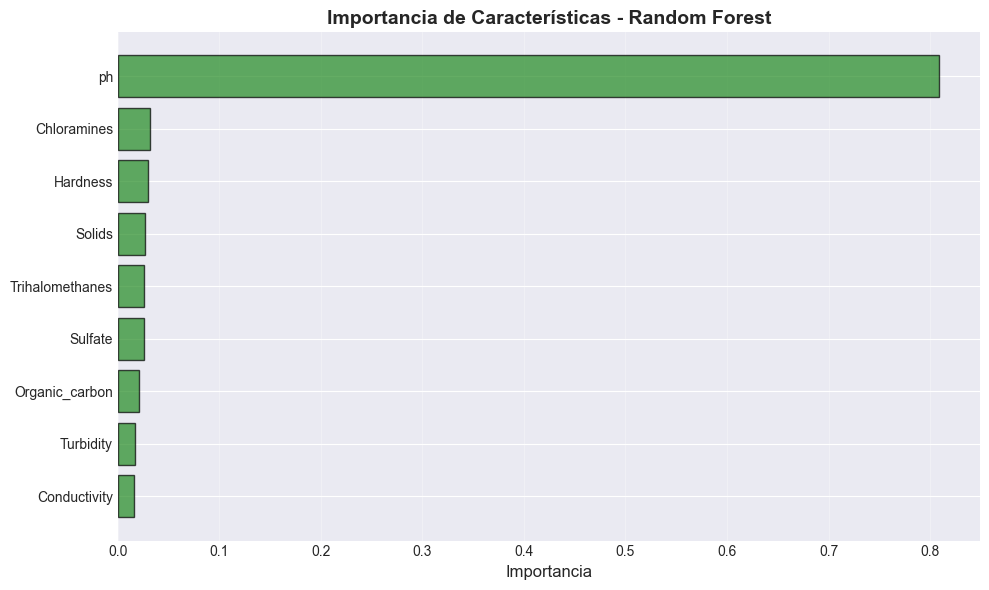

In [22]:
if 'Random Forest' in results:
    print("\n" + "="*80)
    print("IMPORTANCIA DE CARACTERÍSTICAS (Random Forest)")
    print("="*80)
    
    feature_importance = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': results['Random Forest']['model'].feature_importances_
    }).sort_values('Importancia', ascending=False)
    
    print("\n", feature_importance)
    
    # Visualización
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Característica'], feature_importance['Importancia'], 
             color='forestgreen', alpha=0.7, edgecolor='black')
    plt.xlabel('Importancia', fontsize=12)
    plt.title('Importancia de Características - Random Forest', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('08_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
print("\n" + "="*80)
print("9. RESUMEN FINAL DEL PROYECTO")
print("="*80)

print("\n✓ PROYECTO COMPLETADO EXITOSAMENTE")
print("\nPasos realizados:")
print("1. ✓ Carga y exploración de datos (EDA)")
print("2. ✓ Análisis de valores faltantes")
print("3. ✓ Análisis de distribuciones")
print("4. ✓ Análisis de correlaciones")
print("5. ✓ Preprocesamiento (imputación y escalado)")
print("6. ✓ División del dataset (80-20)")
print("7. ✓ Entrenamiento de 3 modelos:")
print("   - Regresión Logística")
print("   - K-NN (con optimización de hiperparámetros)")
print("   - Random Forest (con optimización de hiperparámetros)")
print("8. ✓ Evaluación completa de modelos")
print("9. ✓ Selección del mejor modelo")

print("\n📊 Visualizaciones generadas:")
print("   - 01_missing_values.png")
print("   - 02_histograms.png")
print("   - 03_boxplots.png")
print("   - 04_correlation_matrix.png")
print("   - 05_confusion_matrices.png")
print("   - 06_roc_curves.png")
print("   - 07_metrics_comparison.png")
print("   - 08_feature_importance.png")

print("\n" + "="*80)
print("FIN DEL ANÁLISIS")
print("="*80)


RESUMEN FINAL DEL PROYECTO

✓ PROYECTO COMPLETADO EXITOSAMENTE

Pasos realizados:
1. ✓ Carga y exploración de datos (EDA)
2. ✓ Análisis de valores faltantes
3. ✓ Análisis de distribuciones
4. ✓ Análisis de correlaciones
5. ✓ Preprocesamiento (imputación y escalado)
6. ✓ División del dataset (80-20)
7. ✓ Entrenamiento de 3 modelos:
   - Regresión Logística
   - K-NN (con optimización de hiperparámetros)
   - Random Forest (con optimización de hiperparámetros)
8. ✓ Evaluación completa de modelos
9. ✓ Selección del mejor modelo

📊 Visualizaciones generadas:
   - 01_missing_values.png
   - 02_histograms.png
   - 03_boxplots.png
   - 04_correlation_matrix.png
   - 05_confusion_matrices.png
   - 06_roc_curves.png
   - 07_metrics_comparison.png
   - 08_feature_importance.png

FIN DEL ANÁLISIS


In [ ]:
import joblib
import json
from datetime import datetime
import os

print("\n" + "="*80)
print("GUARDANDO MODELO Y PREPROCESADOR PARA DESPLIEGUE WEB")
print("="*80)
# El mejor modelo ya fue seleccionado anteriormente
best_model = results[best_model_name]['model']

print(f"\n✓ Mejor modelo seleccionado: {best_model_name}")
print(f"  Tipo: {type(best_model).__name__}")


# 2.1 Guardar el modelo
joblib.dump(best_model, 'water_quality_model.joblib')
print(f"✓ Modelo guardado: water_quality_model.joblib")

# 2.2 Guardar el scaler
joblib.dump(scaler, 'scaler.joblib')
print(f"✓ Scaler guardado: scaler.joblib")

# 2.3 Guardar el imputer
joblib.dump(imputer, 'imputer.joblib')
print(f"✓ Imputer guardado: imputer.joblib")

# 2.4 Guardar nombres de características
feature_names = list(X.columns)
joblib.dump(feature_names, 'feature_names.joblib')
print(f"✓ Nombres de características guardados: feature_names.joblib")


config = {
    "model": {
        "name": best_model_name,
        "type": type(best_model).__name__,
        "version": "1.0",
        "training_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    },
    "features": feature_names,
    "preprocessing": {
        "imputer": "median",
        "scaler": "StandardScaler"
    },
    "metrics": {
        "accuracy": float(best_model_metrics['Accuracy']),
        "precision": float(best_model_metrics['Precision']),
        "recall": float(best_model_metrics['Recall']),
        "f1_score": float(best_model_metrics['F1-Score']),
        "roc_auc": float(best_model_metrics['ROC-AUC']) if best_model_metrics['ROC-AUC'] else None
    },
    "feature_ranges": {
        feature: {
            "min": float(df[feature].min()),
            "max": float(df[feature].max()),
            "mean": float(df[feature].mean()),
            "std": float(df[feature].std())
        }
        for feature in feature_names
    }
}

with open('model_config.json', 'w') as f:
    json.dump(config, f, indent=4)
print(f"✓ Configuración guardada: model_config.json")


print("\n" + "="*80)
print("VERIFICACIÓN DE ARCHIVOS")
print("="*80)

files_to_check = [
    'water_quality_model.joblib',
    'scaler.joblib',
    'imputer.joblib',
    'feature_names.joblib',
    'model_config.json'
]

print("\nArchivos generados:")
for filename in files_to_check:
    if os.path.exists(filename):
        size = os.path.getsize(filename) / 1024  # KB
        print(f"  ✓ {filename:<35} ({size:.2f} KB)")
    else:
        print(f"  ✗ {filename:<35} (NO ENCONTRADO)")


print("\n" + "="*80)
print("PRUEBA DE CARGA DEL MODELO")
print("="*80)

try:
    # Cargar todos los archivos
    loaded_model = joblib.load('water_quality_model.joblib')
    loaded_scaler = joblib.load('scaler.joblib')
    loaded_imputer = joblib.load('imputer.joblib')
    loaded_features = joblib.load('feature_names.joblib')
    
    with open('model_config.json', 'r') as f:
        loaded_config = json.load(f)
    
    print("\n✓ Todos los archivos cargados exitosamente")
    print(f"✓ Modelo: {type(loaded_model).__name__}")
    print(f"✓ Características: {len(loaded_features)}")
    
    # Hacer una predicción de prueba
    sample_data = X_test.iloc[0:1].values
    sample_data_imputed = loaded_imputer.transform(sample_data)
    sample_data_scaled = loaded_scaler.transform(sample_data_imputed)
    prediction = loaded_model.predict(sample_data_scaled)
    probability = loaded_model.predict_proba(sample_data_scaled)
    
    print(f"\n✓ Predicción de prueba exitosa:")
    print(f"  - Predicción: {prediction[0]} ({'Potable' if prediction[0] == 1 else 'No Potable'})")
    print(f"  - Probabilidad No Potable: {probability[0][0]:.4f}")
    print(f"  - Probabilidad Potable: {probability[0][1]:.4f}")
    
    print("\n" + "="*80)
    print("✅ ARCHIVOS GUARDADOS Y VERIFICADOS CORRECTAMENTE")
    print("="*80)
    print("\n🚀 Ahora puedes ejecutar tu aplicación Streamlit:")
    print("   streamlit run app.py")
    print("="*80)
    
except Exception as e:
    print(f"\n❌ Error al cargar archivos: {str(e)}")
    print("Verifica que todos los archivos se hayan guardado correctamente.")


GUARDANDO MODELO Y PREPROCESADOR PARA DESPLIEGUE WEB

✓ Mejor modelo seleccionado: Random Forest
  Tipo: RandomForestClassifier
✓ Modelo guardado: water_quality_model.joblib
✓ Scaler guardado: scaler.joblib
✓ Imputer guardado: imputer.joblib
✓ Nombres de características guardados: feature_names.joblib
✓ Configuración guardada: model_config.json

VERIFICACIÓN DE ARCHIVOS

Archivos generados:
  ✓ water_quality_model.joblib          (113.60 KB)
  ✓ scaler.joblib                       (1.16 KB)
  ✓ imputer.joblib                      (0.89 KB)
  ✓ feature_names.joblib                (0.12 KB)
  ✓ model_config.json                   (2.37 KB)

PRUEBA DE CARGA DEL MODELO

✓ Todos los archivos cargados exitosamente
✓ Modelo: RandomForestClassifier
✓ Características: 9

✓ Predicción de prueba exitosa:
  - Predicción: 1 (Potable)
  - Probabilidad No Potable: 0.1467
  - Probabilidad Potable: 0.8533

✅ ARCHIVOS GUARDADOS Y VERIFICADOS CORRECTAMENTE

🚀 Ahora puedes ejecutar tu aplicación Streamli